In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
#Loading the dataset
df = pd.read_csv("C:\\Users\\RISHIKA RAVICHANDRAN\\OneDrive - Amrita Vishwa Vidyapeetham\\Desktop\\Internship\\Sapience\\Week 2\\cardekho.csv")
print("Dataset Info: ", df.info(),"\n\n\n")
#print the first 20 entries
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
Dataset Info:  None 





,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0


In [3]:
df = df.drop_duplicates()
df = df.drop(columns=["name"], errors='ignore')
for col in ['mileage(km/ltr/kg)', 'engine', 'seats']:
    df[col].fillna(df[col].median(), inplace=True)
#for max_power we first replace by the most observed value
df['max_power'].fillna(df['max_power'].mode(),inplace = True)
#covert into numeric
df['max_power']=pd.to_numeric(df['max_power'], errors='coerce')
#replace the NaN values obtained after coversion by median
df['max_power'].fillna(df['max_power'].median(), inplace=True)
#encoding - coverting categorical values
encoder = LabelEncoder()
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
encoding_mappings = {}
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
    encoding_mappings[col] = dict(zip(encoder.classes_, range(len(encoder.classes_))))
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [4]:
X = df.drop(columns=["selling_price"])
y = df["selling_price"]
# Scaling features for regression models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 1. Linear Regression

Linear Regression MSE: 94596219903.38426
Linear Regression R2: 0.5686872253788728
Linear Regression MAE: 173245.8345193564

Linear Regression Feature Importance:
 max_power             268635.640157
year                  129357.459022
engine                 34222.224387
mileage(km/ltr/kg)     13221.027303
seats                  -7363.948151
owner                 -14990.767879
fuel                  -38289.052934
seller_type           -39482.780558
km_driven             -58499.783689
transmission          -90649.320031
dtype: float64


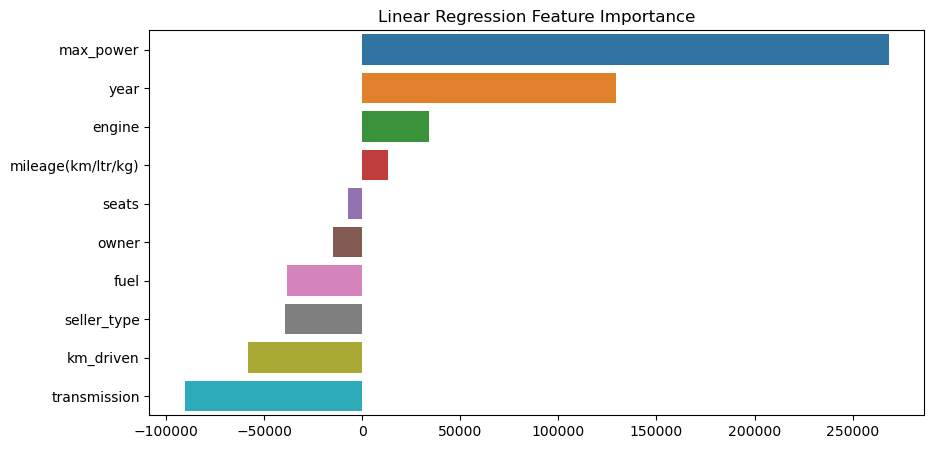

In [9]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

# Feature Importance for Linear Regression
feature_importance = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
print("\nLinear Regression Feature Importance:\n", feature_importance)

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Linear Regression Feature Importance")
plt.show()

### 2. Logistic Regression

In [12]:
median_price = y.median()
y_binary = (y > median_price).astype(int)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bin, y_train_bin)
y_pred_log = log_reg.predict(X_test_bin)

print("Logistic Regression Accuracy:", accuracy_score(y_test_bin, y_pred_log))
print("Precision:", precision_score(y_test_bin, y_pred_log))
print("Recall:", recall_score(y_test_bin, y_pred_log))
print("F1-Score:", f1_score(y_test_bin, y_pred_log))

Logistic Regression Accuracy: 0.8636363636363636
Precision: 0.8693759071117562
Recall: 0.8581661891117478
F1-Score: 0.8637346791636625


### 3. Decision Tree

Decision Tree Training Accuracy: 0.9093862815884477
Decision Tree Testing Accuracy: 0.8686868686868687
Confusion Matrix:
[[590  98]
 [ 84 614]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       688
           1       0.86      0.88      0.87       698

    accuracy                           0.87      1386
   macro avg       0.87      0.87      0.87      1386
weighted avg       0.87      0.87      0.87      1386

Precision:  0.8623595505617978
Recall:  0.8796561604584527
F1-Score:  0.8709219858156029


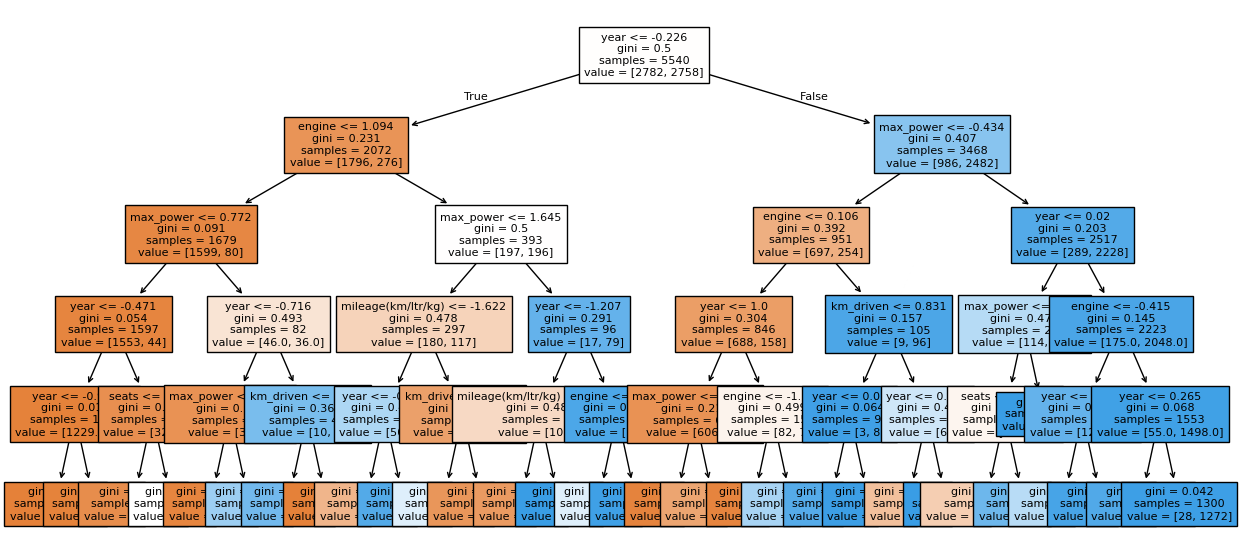

Decision Tree Feature Importance:
 year                  0.521381
max_power             0.311872
engine                0.136096
mileage(km/ltr/kg)    0.016060
seats                 0.009073
km_driven             0.005518
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
dtype: float64


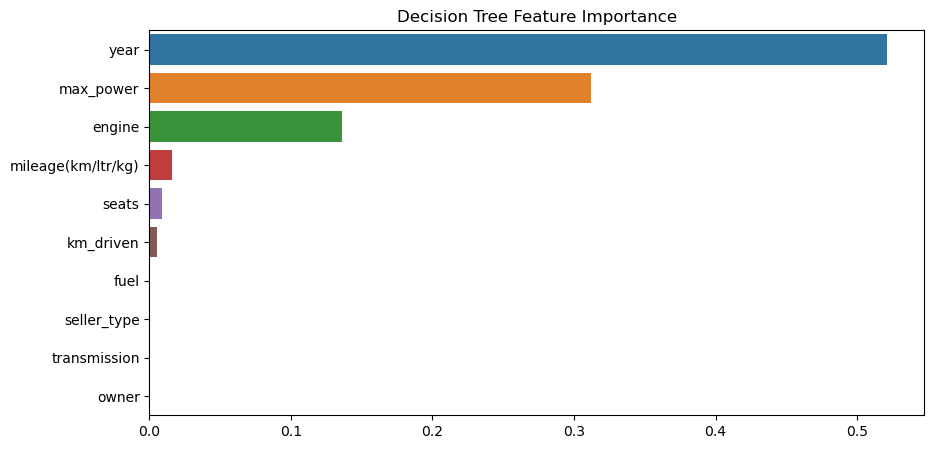

In [21]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_bin, y_train_bin)
y_pred_dt_train = dt.predict(X_train_bin)
y_pred_dt_test = dt.predict(X_test_bin)

print("Decision Tree Training Accuracy:", accuracy_score(y_train_bin, y_pred_dt_train))
print("Decision Tree Testing Accuracy:", accuracy_score(y_test_bin, y_pred_dt_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_dt_test))
print("Classification Report:")
print(classification_report(y_test_bin, y_pred_dt_test))
print("Precision: ", precision_score(y_test_bin, y_pred_dt_test))
print("Recall: ", recall_score(y_test_bin, y_pred_dt_test))
print("F1-Score: ", f1_score(y_test_bin, y_pred_dt_test))

plt.figure(figsize=(15,7))
plot_tree(dt, feature_names=X.columns, filled=True, fontsize=8)
plt.show()

# Feature Importance
dt_feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Decision Tree Feature Importance:\n", dt_feature_importance)

plt.figure(figsize=(10,5))
sns.barplot(x=dt_feature_importance.values, y=dt_feature_importance.index)
plt.title("Decision Tree Feature Importance")
plt.show()

### 4. Random Forest

Random Forest Feature Importance:
 max_power             0.619283
year                  0.235186
mileage(km/ltr/kg)    0.044925
km_driven             0.043395
engine                0.028578
seats                 0.009780
transmission          0.007910
fuel                  0.005205
owner                 0.003226
seller_type           0.002511
dtype: float64


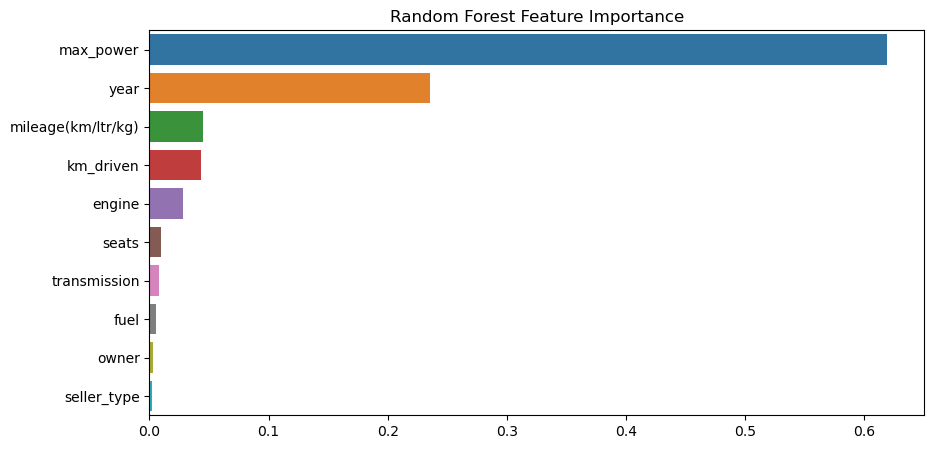

Decision Tree MSE: 0.13131313131313133
Random Forest MSE: 18248431290.3928
Decision Tree R2: 0.4747201306057176
Random Forest R2: 0.9167960248265615
Decision Tree MAE: 0.13131313131313133
Random Forest MAE: 77372.3264428092


In [22]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#  Feature Importance
rf_feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)
plt.figure(figsize=(10,5))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index)
plt.title("Random Forest Feature Importance")
plt.show()

# Comparing Decision Tree and Random Forest Performance
print("Decision Tree MSE:", mean_squared_error(y_test_bin, y_pred_dt_test))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Decision Tree R2:", r2_score(y_test_bin, y_pred_dt_test))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Decision Tree MAE:", mean_absolute_error(y_test_bin, y_pred_dt_test))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

### 5. Model Evaluation Metrics

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


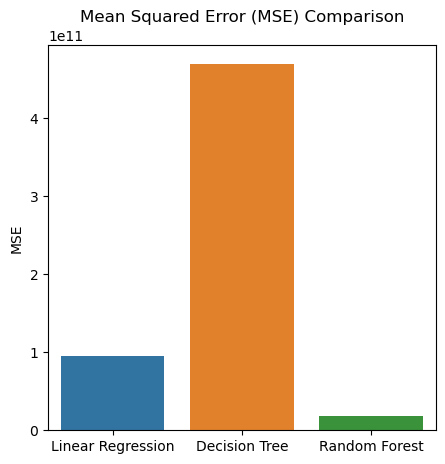

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


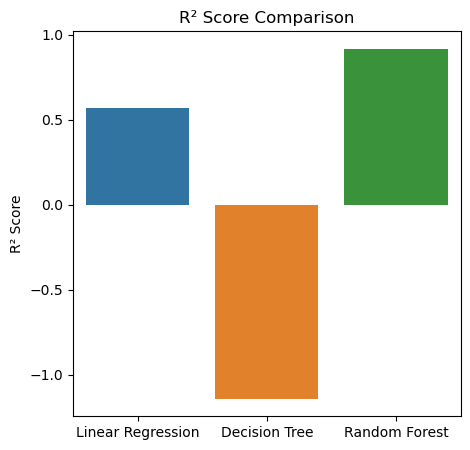

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


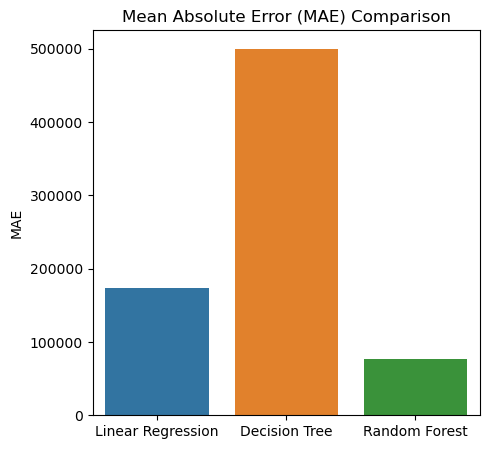

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


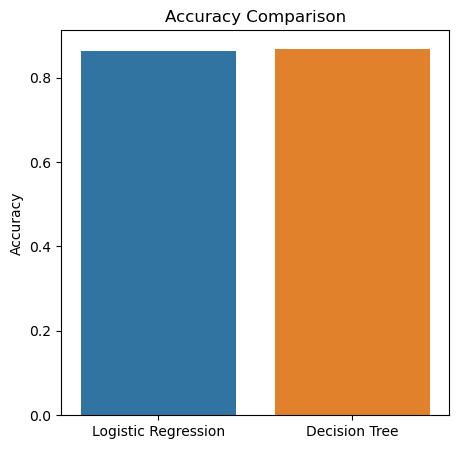

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


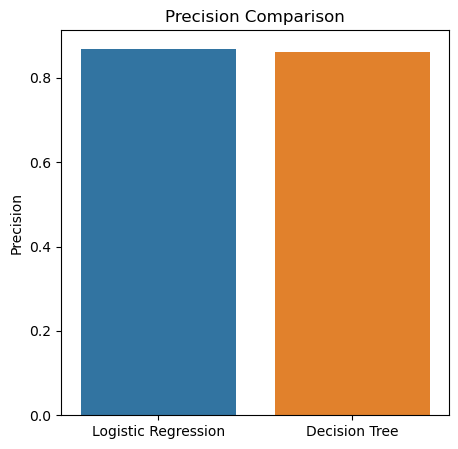

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


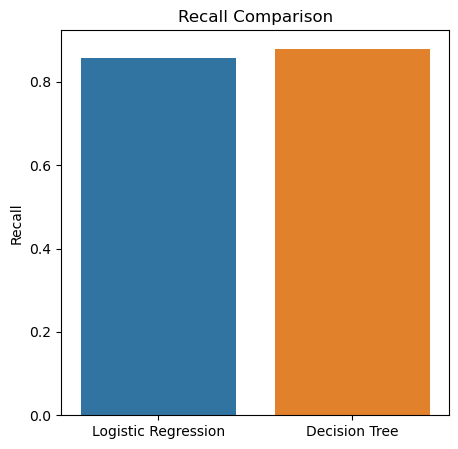

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


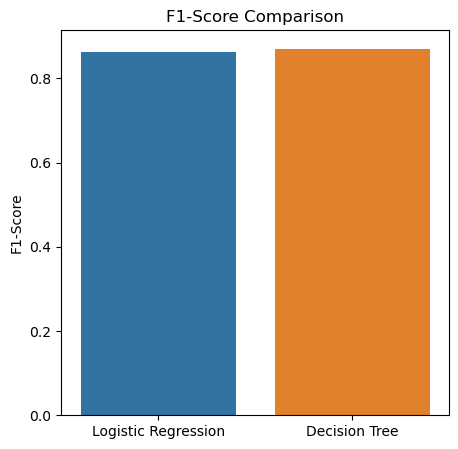

In [15]:
# Regression Models Comparison
regression_models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_dt_test),
    mean_squared_error(y_test, y_pred_rf)
]
r2_values = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt_test),
    r2_score(y_test, y_pred_rf)
]
mae_values = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_dt_test),
    mean_absolute_error(y_test, y_pred_rf)
]

# Plot MSE Comparison
plt.figure(figsize=(5,5))
sns.barplot(x=regression_models, y=mse_values)
plt.title("Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.show()

# Plot R² Score Comparison
plt.figure(figsize=(5,5))
sns.barplot(x=regression_models, y=r2_values)
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.show()

# Plot MAE Comparison
plt.figure(figsize=(5,5))
sns.barplot(x=regression_models, y=mae_values)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE")
plt.show()

# Classification Models Comparison
classification_models = ['Logistic Regression', 'Decision Tree']
accuracy_values = [
    accuracy_score(y_test_bin, y_pred_log),
    accuracy_score(y_test_bin, y_pred_dt_test)
]
precision_values = [
    precision_score(y_test_bin, y_pred_log),
    precision_score(y_test_bin, y_pred_dt_test)
]
recall_values = [
    recall_score(y_test_bin, y_pred_log),
    recall_score(y_test_bin, y_pred_dt_test)
]
f1_values = [
    f1_score(y_test_bin, y_pred_log),
    f1_score(y_test_bin, y_pred_dt_test)
]

# Plot Accuracy Comparison
plt.figure(figsize=(5,5))
sns.barplot(x=classification_models, y=accuracy_values)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(5,5))
sns.barplot(x=classification_models, y=precision_values)
plt.title("Precision Comparison")
plt.ylabel("Precision")
plt.show()

# Plot Recall Comparison
plt.figure(figsize=(5,5))
sns.barplot(x=classification_models, y=recall_values)
plt.title("Recall Comparison")
plt.ylabel("Recall")
plt.show()

# Plot F1-Score Comparison
plt.figure(figsize=(5,5))
sns.barplot(x=classification_models, y=f1_values)
plt.title("F1-Score Comparison")
plt.ylabel("F1-Score")
plt.show()

### 6. Hyperparameter Tuning

In [19]:
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
# Random Search for Decision Tree
param_dist = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10)
}
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", random_search.best_params_)


Best Parameters for Decision Tree: {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 10}


In [18]:
# k-Fold Cross-Validation
rf_cv_scores = cross_val_score(RandomForestRegressor(**grid_search.best_params_, random_state=42), X_scaled, y, cv=5, scoring='r2')
print("Random Forest Cross-Validation R2 Scores:", rf_cv_scores)
print("Mean CV R2 Score:", np.mean(rf_cv_scores))

Random Forest Cross-Validation R2 Scores: [0.83887925 0.89458054 0.90049905 0.86840721 0.89867843]
Mean CV R2 Score: 0.8802088948730526
